<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH-ML/blob/main/MultilayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

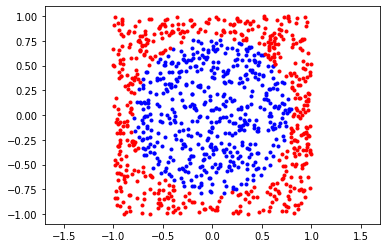

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100):
    data = 2*np.random.rand(n, 2)-1
    label = np.zeros(n)
    label[np.linalg.norm(data, axis=-1)<0.8] = 1
    return data, label

data, label = generate_data(1000)
plt.figure()
plt.plot(data[label==1, 0], data[label==1, 1], "b.")
plt.plot(data[label==0, 0], data[label==0, 1], "r.")
plt.axis("equal")
plt.show()

(1000,)
[[0.68997448 0.68997448 0.68997448 0.68997448]
 [0.85814894 0.85814894 0.450166   0.450166  ]]
[3.75989792 3.61662988]
[0.97724379 0.97383017]


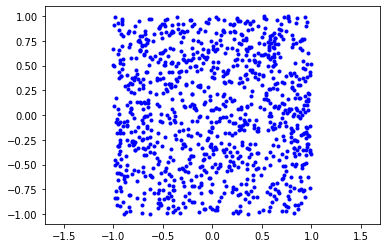

[1]


100%|██████████| 10000/10000 [00:02<00:00, 4527.39it/s]


0.2437601406781626
b2 [-2.76266684]


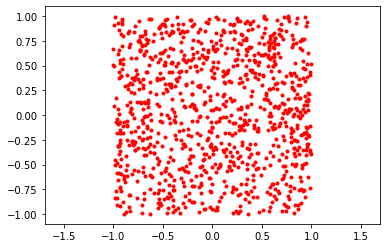

In [57]:
from tqdm import tqdm
W1 = 0.1*np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = 0.1*np.random.randn(4, 1)
b2 = np.random.randn(1)
W1 = np.array([
    [1,0],
    [0,1],
    [0,-1],
    [-1,0]
]).T
b1 = np.array([0.8, 0.8, 0.8, 0.8])
W2 = np.array([1,1,1,1])
b2 = np.array([1])
#b2 = np.array([-2.7])

data_neu = 20*np.random.rand(1000, 2)-10
data_neu = data

s = lambda x: 1/(1+np.exp(-x))
f = lambda x, W1, b1, W2, b2: s(s(x@W1+b1)@W2+b2).flatten()

pred = f(data_neu, W1, b1, W2, b2)
print(pred.shape)
test = np.array([[0,0],[1,1]])
print(s(test@W1+b1))
print(s(test@W1+b1)@W2+b2)
print(f(test, W1, b1, W2, b2))
plt.figure()
plt.plot(data_neu[pred>=0.5, 0], data_neu[pred>=0.5, 1], "b.")
plt.plot(data_neu[pred<0.5, 0], data_neu[pred<0.5, 1], "r.")
plt.axis("equal")
plt.show()

lr_start = 1e-2
lr_end = 1e-2
n_epochs = 10000


print(b2)
for epoch in tqdm(range(n_epochs)):
    lr = lr_start*(lr_end/lr_start)**(epoch/n_epochs)
    schritt1 = data_neu@W1+b1
    schritt2 = s(schritt1)
    schritt3 = schritt2@W2+b2
    dschritt3_b2 = 1
    schritt4 = s(schritt3).flatten()
    dschritt4_schritt3 = s(schritt3)*(1-s(schritt3))
    loss = np.mean((schritt4-label)**2)
    dloss_schritt4 = 2*np.mean(schritt4-label)
    dloss_b2 = dloss_schritt4*dschritt4_schritt3*dschritt3_b2
    #print(dloss_b2)

    # Gradientenabstieg
    b2 = b2-lr*np.mean(dloss_b2)

print(loss)
print("b2",b2)

pred = f(data_neu, W1, b1, W2, b2)
plt.figure()
plt.plot(data_neu[pred>=0.5, 0], data_neu[pred>=0.5, 1], "b.")
plt.plot(data_neu[pred<0.5, 0], data_neu[pred<0.5, 1], "r.")
plt.axis("equal")
plt.show()

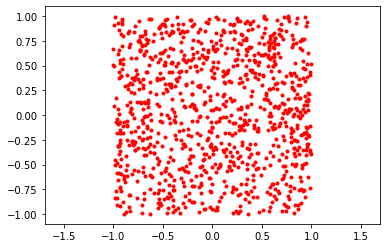

In [53]:
pred = f(data_neu, W1, b1, W2, -2.76)
plt.figure()
plt.plot(data_neu[pred>=0.5, 0], data_neu[pred>=0.5, 1], "b.")
plt.plot(data_neu[pred<0.5, 0], data_neu[pred<0.5, 1], "r.")
plt.axis("equal")
plt.show()